In [1]:
%matplotlib inline
import collections
import sys
import subprocess
import pandas as pd
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy
import library.fit as ft

In [2]:
mm_genes = '../data/TH-TARGET-OSTEO-C0-MERGED/MultiModalGenes/'
exp_path = '../data/TREE-TARGET-C0-MERGED.tsv'

In [3]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

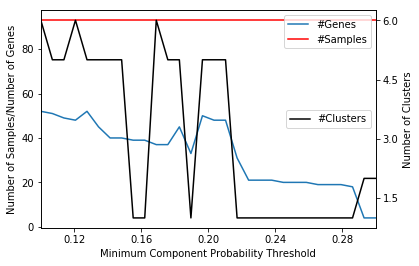

In [5]:
if True:

    scan = hy.ScanEnrichmentAnalysis(mm_genes, 
                                     exp_path, 
                                     'GO',
                                     min_prob_range=np.linspace(0.1, 0.3, 30), 
                                     CPU=7,
                                     K=5).scan()
    
    scan

In [6]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.100000,7,muscle contraction|chemical synaptic transmiss...,PTGS2|MYOM1|ACTC1|DES|CACNA2D2|MYL4|S100B|NTRK...,52,6,93
0.106897,4,muscle contraction|anterograde trans-synaptic ...,PTGS2|MYOM1|ACTC1|DES|CACNA2D2|MYL4|S100B|NTRK...,51,5,93
0.113793,5,muscle contraction|striated muscle contraction...,MYOM1|ACTC1|DES|CACNA2D2|MYL4|S100B|NTRK2|PCDH...,49,5,93
0.120690,4,muscle contraction|anterograde trans-synaptic ...,MYOM1|ACTC1|DES|CACNA2D2|S100B|NTRK2|PCDHGB5|S...,48,6,93
0.127586,8,muscle contraction|chemical synaptic transmiss...,MYOM1|ACTC1|SORCS2|DES|CACNA2D2|S100B|NTRK2|PC...,52,5,93
0.134483,7,muscle contraction|chemical synaptic transmiss...,MYOM1|ACTC1|SORCS2|DES|CACNA2D2|S100B|NTRK2|SY...,45,5,93
0.141379,6,muscle contraction|chemical synaptic transmiss...,MYOM1|ACTC1|DES|CACNA2D2|S100B|NTRK2|SYT15|P2R...,40,5,93
0.148276,4,striated muscle contraction|neuropeptide signa...,MYOM1|ACTC1|SORCS2|CACNA2D2|BCHE|NTRK2|S100B|T...,40,5,93
0.155172,4,neuropeptide signaling pathway|striated muscle...,MYOM1|ACTC1|SORCS2|CACNA2D2|BCHE|NTRK2|S100B|T...,39,1,93


In [7]:
res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_prob_filter=0.168966,
                            gmt_path='GO')

In [8]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,GO:0007218,GO:0007218,neuropeptide signaling pathway,8/241,31/11850,1.372415e-07,0.000256,0.000244,NPW/NXPH3/PENK/PNOC/NMU/SORCS2/POMC/PCSK1N,8
1,GO:0006941,GO:0006941,striated muscle contraction,13/241,105/11850,1.959997e-07,0.000256,0.000244,SCN4B/KCNH2/LMOD3/HRC/MYH3/CACNA1G/MYOM1/ACTC1...,13
2,GO:0098916,GO:0098916,anterograde trans-synaptic signaling,21/241,321/11850,2.419311e-06,0.000947,0.000904,SNAP25/RIMS4/LAMA2/AMPH/APBA2/SYBU/NRXN1/TRIM9...,21


In [9]:
genes = res.get_enriched_term_genes()

len(genes)

37

In [10]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=5, 
                                   verbose=True)

centering data


In [11]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [12]:
hclust = hy.HClust(data=exp.reindex(genes))

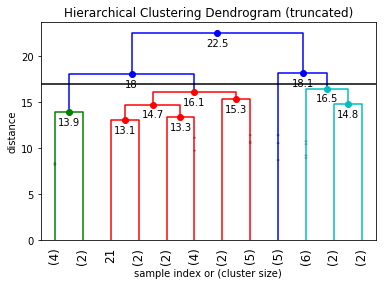

In [13]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

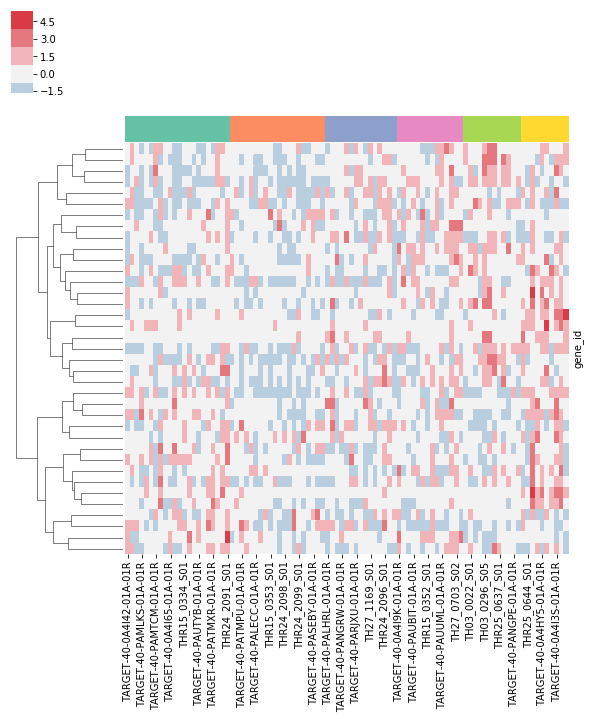

In [14]:
col_order = assign.sort_values(1).index.values
cmap = sns.color_palette("Set2", max(assign[1].values))
col_colors = [cmap[x - 1] for x in assign.sort_values(1)[1].values]

g = sns.clustermap(exp.reindex(genes).reindex(col_order, axis=1),
                   col_cluster=False,
                   col_colors=col_colors,
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

#ax.set_xticklabels([])
#ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = '../img/tree-target-cluster-0-expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

pth = '../img/tree-target-cluster-0-expression-heatmap.png'
plt.savefig(pth, format='png', bbox_inches='tight')

In [15]:
fgsea = clus.get_cluster_features(exp, 
                                  gmt='/opt/hydra/gene-sets/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_symbol.gmt')

In [16]:
fgsea[5]

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
EUKARYOTIC TRANSLATION ELONGATION%REACTOME DATABASE ID RELEASE 66%156842,0.000122,0.013842,0.679709,4.198207,0,91,RPS5|EEF1A2|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL1...
PEPTIDE CHAIN ELONGATION%REACTOME DATABASE ID RELEASE 66%156902,0.000122,0.013842,0.676311,4.127974,0,87,RPS5|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL18|RPS2|...
FORMATION OF A POOL OF FREE 40S SUBUNITS%REACTOME DATABASE ID RELEASE 66%72689,0.000121,0.013842,0.648215,4.080189,0,99,RPS5|RPL13A|RPL13|RPS11|EIF3E|RPL15|RPSA|RPL18...
VIRAL MRNA TRANSLATION%REACTOME%R-HSA-192823.3,0.000122,0.013842,0.665409,4.061429,0,87,RPS5|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL18|RPS2|...
EUKARYOTIC TRANSLATION TERMINATION%REACTOME%R-HSA-72764.4,0.000122,0.013842,0.647042,3.996442,0,91,RPS5|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL18|RPS2|...
SELENOAMINO ACID METABOLISM%REACTOME%R-HSA-2408522.2,0.000120,0.013842,0.617832,3.986850,0,111,RPS5|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL18|AHCY|...
SELENOCYSTEINE SYNTHESIS%REACTOME%R-HSA-2408557.2,0.000122,0.013842,0.646302,3.981362,0,90,RPS5|RPL13A|RPL13|RPS11|RPL15|RPSA|RPL18|RPS2|...
RRNA PROCESSING IN THE NUCLEUS AND CYTOSOL%REACTOME%R-HSA-8868773.2,0.000117,0.013842,0.551387,3.963728,0,190,RPS5|NOB1|RPL13A|RPL13|DIEXF|RPS11|EXOSC5|RPL1...
L13A-MEDIATED TRANSLATIONAL SILENCING OF CERULOPLASMIN EXPRESSION%REACTOME DATABASE ID RELEASE 66%156827,0.000121,0.013842,0.615960,3.956350,0,109,RPS5|RPL13A|RPL13|RPS11|EIF3E|RPL15|RPSA|RPL18...


In [17]:
for key, values in fgsea.items():
    print('Key', key, '\n')
    t = values.reset_index().reindex(['pathway', 'padj', 'NES'], axis=1)
    #t['pathway'] = t['pathway'].apply(format_pathway) 
    print(t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10))

('Key', 0, '\n')
                                             pathway      padj       NES
0  HALLMARK_E2F_TARGETS%MSIGDB_C2%HALLMARK_E2F_TA...  0.033866  3.473585
1  HALLMARK_MYC_TARGETS_V1%MSIGDB_C2%HALLMARK_MYC...  0.033866  3.331577
2  DNA STRAND ELONGATION%REACTOME DATABASE ID REL...  0.033866  2.884878
3      DNA-DEPENDENT DNA REPLICATION%GOBP%GO:0006261  0.033866  2.796927
4  RETINOBLASTOMA GENE IN CANCER%WIKIPATHWAYS_201...  0.033866  2.782285
5  DNA REPLICATION%WIKIPATHWAYS_20181110%WP466%HO...  0.033866  2.778327
6     PROTON TRANSMEMBRANE TRANSPORT%GOBP%GO:1902600  0.033866  2.773775
7  ACTIVATION OF THE PRE-REPLICATIVE COMPLEX%REAC...  0.033866  2.728344
8  ROLE OF OSX AND MIRNAS IN TOOTH DEVELOPMENT%WI...  0.033866  2.722003
9  HALLMARK_G2M_CHECKPOINT%MSIGDB_C2%HALLMARK_G2M...  0.033866  2.691796
('Key', 1, '\n')
                                             pathway      padj       NES
0  EUKARYOTIC TRANSLATION TERMINATION%REACTOME%R-...  0.018951  4.688900
1     VIRAL MRNA 

In [ ]:
def format_pathway(x):
    fields = x.split('%')
    return '%s (%s)' % (fields[0], fields[1])

pth = '../img/TREE-top-10-pathways-cluster-%d.tex'
for key, values in fgsea.items():
    with pd.option_context('display.precision', 2):
        t = values.reset_index().reindex(['pathway', 'padj', 'NES'], axis=1)
        t['pathway'] = t['pathway'].apply(format_pathway)
        with open(pth % key, 'w') as f:
            t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10).to_latex(f, index=False)

In [ ]:
assign

In [ ]:
def get_event(event):
    if pd.isnull(event):
        print("NULL")
        return np.nan
    
    events = ['Relapse',
              'Death', 
              'Progression',
              'Event',
              'Second Malignant Neoplasm',
              'SMN']
    
    if event in ['Censored', 'No event', 'None']:
        return 0
    
    elif event in events:
        return 1 
    
    else:
        raise ValueError(event)
        
def get_vital(vital):
    if pd.isnull(vital):
        #print("NULL")
        return np.nan
    
    
    if vital == 'Alive':
        return 0
    
    elif vital == 'Dead':
        return 1
    
    else:
        raise ValueError(vital)

pth = '../../without-muscle/data/TARGET_OS_ClinicalData_Discovery_20181009.xlsx'
clinical = pd.read_excel(pth, index_col=0)

surv = pd.DataFrame(index=[x for x in exp.columns if x.startswith('TARGET')], 
                    columns=['OS', 'vital', 'EFS', 'event'])

for sample in exp.columns:
    root = '-'.join(sample.split('-')[:3])
    if root not in clinical.index:
        print "Missing: ", sample
        continue
    
    OS = clinical.loc[root, 'Overall Survival Time in Days'].item()
    vital = get_vital(clinical.loc[root, 'Vital Status'])
    
    EFS = clinical.loc[root, 'Event Free Survival Time in Days'].item()
    event = get_event(clinical.loc[root, 'First Event'])
    
    surv.loc[sample, :] = [OS, vital, EFS, event]
    

for sample in surv.index.values:
    surv.loc[sample, 'cluster'] = int(assign.loc[sample, 1])
    
surv = surv.dropna()
    
surv.to_csv('../data/Tree-TARGET-osteo-C0-survival.tsv', sep='\t')

surv